# I. Preparation

In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

from nn_interpretability.interpretation.lrp.lrp_transpose import LRPTranspose
from nn_interpretability.model.model_trainer import ModelTrainer
from nn_interpretability.model.model_repository import ModelRepository
from nn_interpretability.visualization.mnist_visualizer import MnistVisualizer
from nn_interpretability.dataset.mnist_data_loader import MnistDataLoader

In [2]:
model_name = 'model_cnn.pt'

train = False

In [3]:
mnist_data_loader = MnistDataLoader()

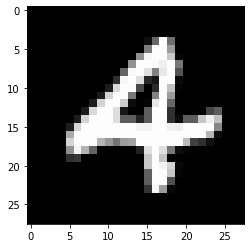

In [4]:
MnistVisualizer.show_dataset_examples(mnist_data_loader.trainloader)

In [5]:
model = ModelRepository.get_general_mnist_cnn(model_name)

if train:
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    model.train()
    ModelTrainer.train(model, criterion, optimizer, mnist_data_loader.trainloader)
    
    ModelRepository.save(model, model_name)

# I. LRP-0 Transpose

In the following, a transposed version of the LRP-0 algorithm is being demonstrated.

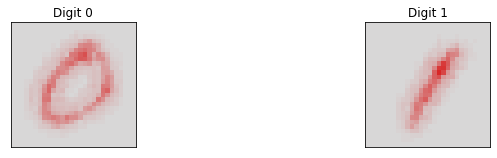

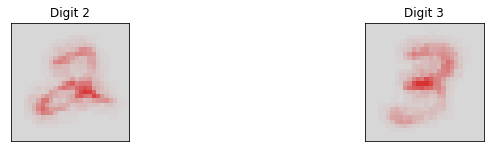

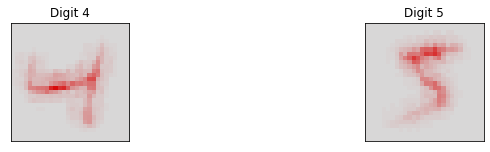

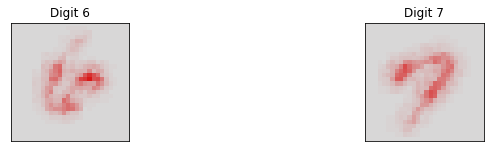

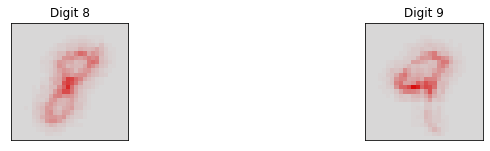

In [6]:
images = []
img_shape = (28, 28)

for i in range(10):
    img = mnist_data_loader.get_image_for_class(i)
    interpretor = LRPTranspose(model, i, None, 0)
    endpoint = interpretor.interpret(img)

    images.append(endpoint[0].numpy().reshape(img_shape))
    
MnistVisualizer.display_heatmap_for_each_class(images)